### install DMwR2 package desde GitHub

In [1]:
install.packages("remotes")
remotes::install_github("ltorgo/DMwR2")

Installing package into 'C:/Users/mario/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'remotes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mario\AppData\Local\Temp\Rtmpg78BxJ\downloaded_packages


Using GitHub PAT from the git credential store.

Skipping install of 'DMwR2' from a github remote, the SHA1 (c19cb087) has not changed since last install.
  Use `force = TRUE` to force installation



### instalar paquetes necesarios

In [2]:
install.packages("dplyr")
install.packages("corrplot")
install.packages("GGally")

Installing package into 'C:/Users/mario/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'dplyr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'dplyr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\mario\AppData\Local\R\win-library\4.5\00LOCK\dplyr\libs\x64\dplyr.dll  a C:\Users\mario\AppData\Local\R\win-library\4.5\dplyr\libs\x64\dplyr.dll: Permission denied"
Warning message:
"restored 'dplyr'"



The downloaded binary packages are in
	C:\Users\mario\AppData\Local\Temp\Rtmpg78BxJ\downloaded_packages


Installing package into 'C:/Users/mario/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mario\AppData\Local\Temp\Rtmpg78BxJ\downloaded_packages


Installing package into 'C:/Users/mario/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mario\AppData\Local\Temp\Rtmpg78BxJ\downloaded_packages


### cargar librerías

In [3]:
library(tidyr)
library(dplyr)
library(corrplot)
library(GGally)
library(DMwR2)
library(ggplot2)


Adjuntando el paquete: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.95 loaded

Cargando paquete requerido: ggplot2

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### cargar y explorar el conjunto de datos

In [4]:
data <- algae
head(data)

season,size,speed,mxPH,mnO2,Cl,NO3,NH4,oPO4,PO4,Chla,a1,a2,a3,a4,a5,a6,a7
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
winter,small,medium,8.00,9.8,60.800,6.238,578.000,105.000,170.000,50.0,0.0,0.0,0.0,0.0,34.2,8.3,0.0
spring,small,medium,8.35,8.0,57.750,1.288,370.000,428.750,558.750,1.3,1.4,7.6,4.8,1.9,6.7,0.0,2.1
autumn,small,medium,8.10,11.4,40.020,5.330,346.667,125.667,187.057,15.6,3.3,53.6,1.9,0.0,0.0,0.0,9.7
spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.700,1.4,3.1,41.0,18.9,0.0,1.4,0.0,1.4
autumn,small,medium,8.06,9.0,55.350,10.416,233.700,58.222,97.580,10.5,9.2,2.9,7.5,0.0,7.5,4.1,1.0
winter,small,high,8.25,13.1,65.750,9.248,430.000,18.250,56.667,28.4,15.1,14.6,1.4,0.0,22.5,12.6,2.9


In [5]:
### glimpse(data) para ver la estructura del data frame
glimpse(data)

Rows: 200
Columns: 18
$ season <fct> winter, spring, autumn, spring, autumn, winter, summer, autumn,…
$ size   <fct> small, small, small, small, small, small, small, small, small, …
$ speed  <fct> medium, medium, medium, medium, medium, high, high, high, mediu…
$ mxPH   <dbl> 8.00, 8.35, 8.10, 8.07, 8.06, 8.25, 8.15, 8.05, 8.70, 7.93, 7.7…
$ mnO2   <dbl> 9.8, 8.0, 11.4, 4.8, 9.0, 13.1, 10.3, 10.6, 3.4, 9.9, 10.2, 11.…
$ Cl     <dbl> 60.800, 57.750, 40.020, 77.364, 55.350, 65.750, 73.250, 59.067,…
$ NO3    <dbl> 6.238, 1.288, 5.330, 2.302, 10.416, 9.248, 1.535, 4.990, 0.886,…
$ NH4    <dbl> 578.000, 370.000, 346.667, 98.182, 233.700, 430.000, 110.000, 2…
$ oPO4   <dbl> 105.000, 428.750, 125.667, 61.182, 58.222, 18.250, 61.250, 44.6…
$ PO4    <dbl> 170.000, 558.750, 187.057, 138.700, 97.580, 56.667, 111.750, 77…
$ Chla   <dbl> 50.000, 1.300, 15.600, 1.400, 10.500, 28.400, 3.200, 6.900, 5.5…
$ a1     <dbl> 0.0, 1.4, 3.3, 3.1, 9.2, 15.1, 2.4, 18.2, 25.4, 17.0, 16.6, 32.…
$ a2     <dbl> 0.0

In [6]:
summary(data)

    season       size       speed         mxPH            mnO2       
 autumn:40   large :45   high  :84   Min.   :5.600   Min.   : 1.500  
 spring:53   medium:84   low   :33   1st Qu.:7.700   1st Qu.: 7.725  
 summer:45   small :71   medium:83   Median :8.060   Median : 9.800  
 winter:62                           Mean   :8.012   Mean   : 9.118  
                                     3rd Qu.:8.400   3rd Qu.:10.800  
                                     Max.   :9.700   Max.   :13.400  
                                     NA's   :1       NA's   :2       
       Cl               NO3              NH4                oPO4       
 Min.   :  0.222   Min.   : 0.050   Min.   :    5.00   Min.   :  1.00  
 1st Qu.: 10.981   1st Qu.: 1.296   1st Qu.:   38.33   1st Qu.: 15.70  
 Median : 32.730   Median : 2.675   Median :  103.17   Median : 40.15  
 Mean   : 43.636   Mean   : 3.282   Mean   :  501.30   Mean   : 73.59  
 3rd Qu.: 57.824   3rd Qu.: 4.446   3rd Qu.:  226.95   3rd Qu.: 99.33  
 Max.   

In [7]:
## ver cantidad de NA
sum(is.na(data))

[1] 33

In [8]:
## elimina filas con NA
data <- na.omit(data)
sum(is.na(data))

[1] 0

### cambiar de nombres a las columnas e eliminar columnas no necesarias

In [9]:
colnames(data) <- c("estacion", "tamano", "velocidad", "ph", "o2", "cl", "no3",
                    "nh4", "opo4", "po4", "Clorofila", "A1", "A2", "A3")

### eliminar columnas no necesarias, solo tener hasta la columna 14
data <- data[, 1:14]
head(data)

estacion,tamano,velocidad,ph,o2,cl,no3,nh4,opo4,po4,Clorofila,A1,A2,A3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
winter,small,medium,8.00,9.8,60.800,6.238,578.000,105.000,170.000,50.0,0.0,0.0,0.0
spring,small,medium,8.35,8.0,57.750,1.288,370.000,428.750,558.750,1.3,1.4,7.6,4.8
autumn,small,medium,8.10,11.4,40.020,5.330,346.667,125.667,187.057,15.6,3.3,53.6,1.9
spring,small,medium,8.07,4.8,77.364,2.302,98.182,61.182,138.700,1.4,3.1,41.0,18.9
autumn,small,medium,8.06,9.0,55.350,10.416,233.700,58.222,97.580,10.5,9.2,2.9,7.5
winter,small,high,8.25,13.1,65.750,9.248,430.000,18.250,56.667,28.4,15.1,14.6,1.4


### Analisis con graficos

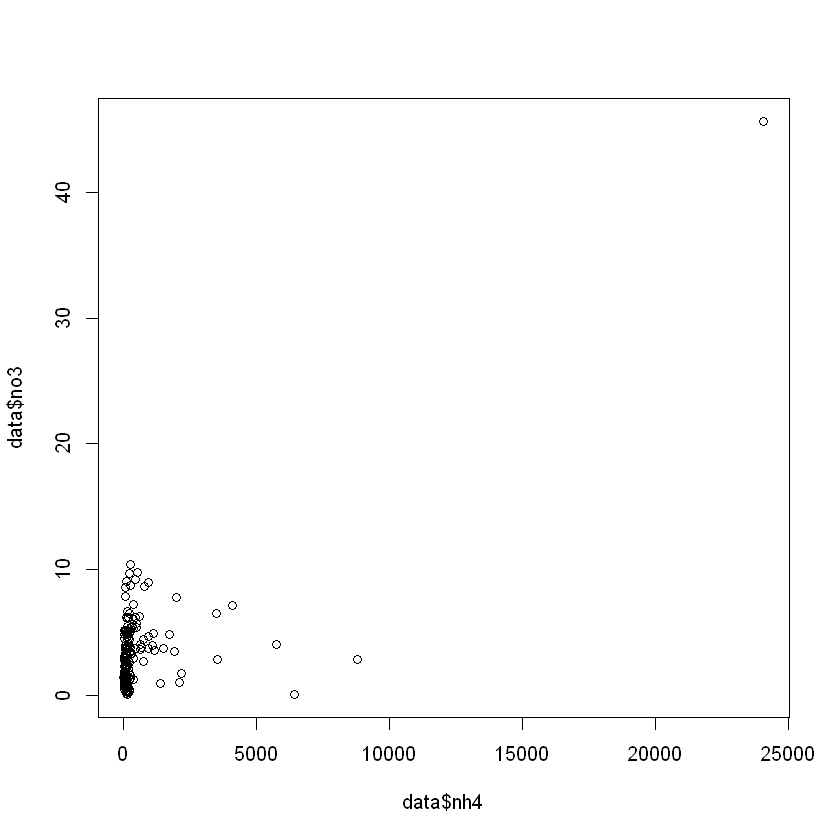

In [10]:
plot(data$nh4, data$no3)

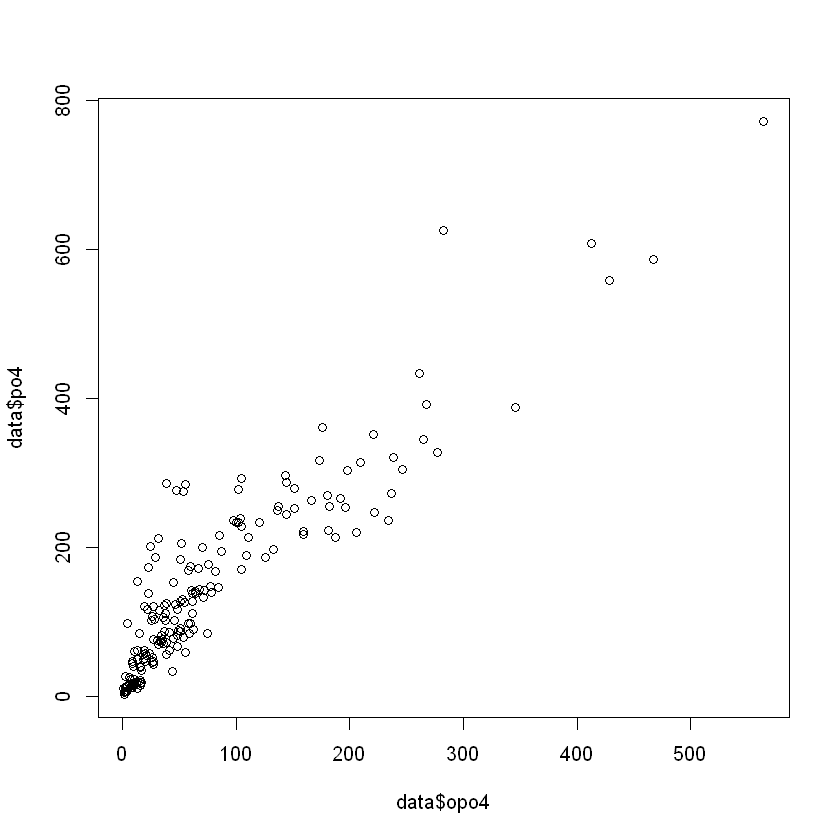

In [11]:
plot(data$opo4, data$po4)

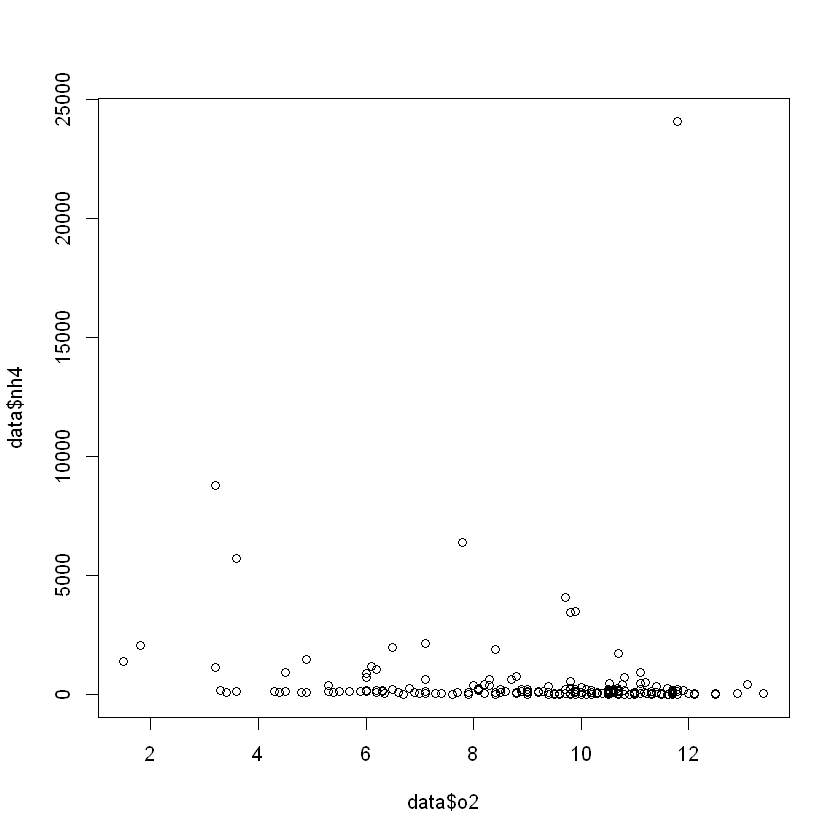

In [12]:
plot(data$o2, data$nh4)

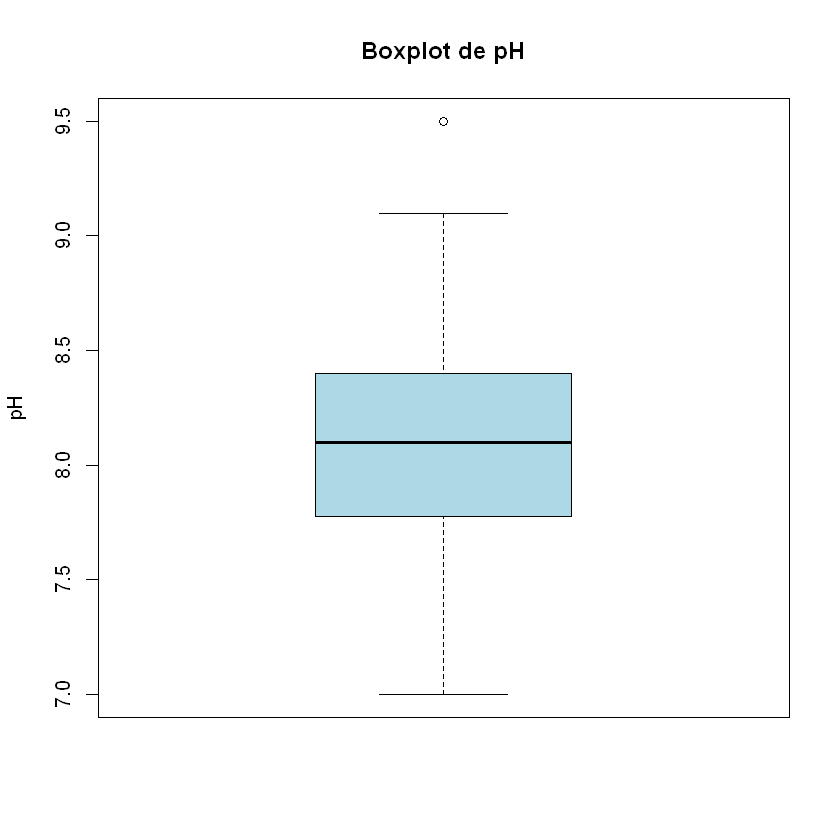

In [13]:
boxplot(data$ph, main="Boxplot de pH", ylab="pH", col="lightblue")

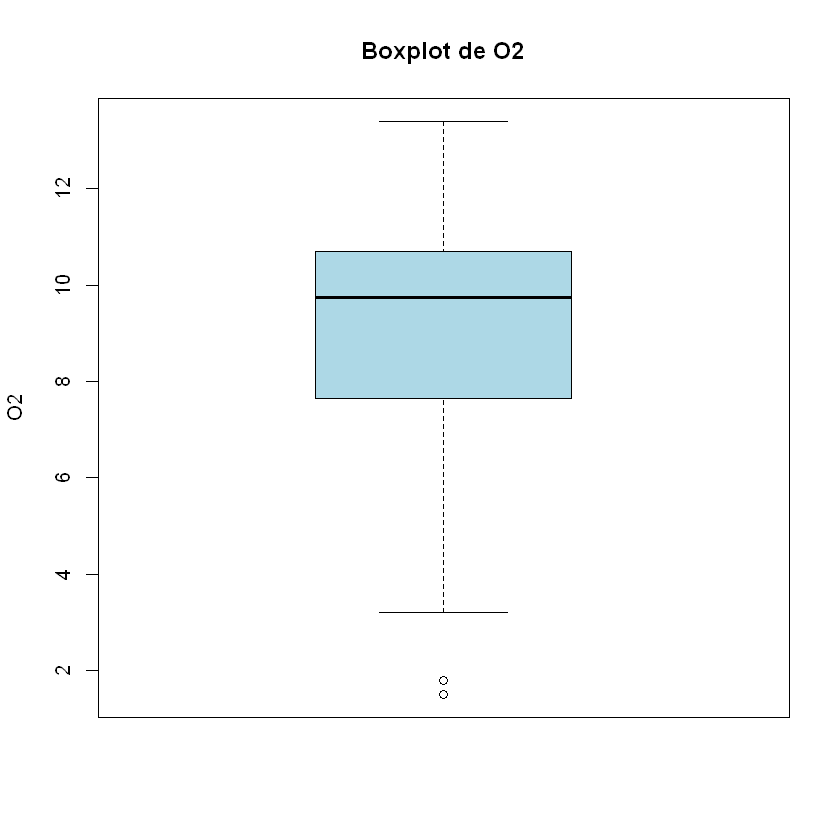

In [14]:
boxplot(data$o2, main="Boxplot de O2", ylab="O2", col="lightblue")

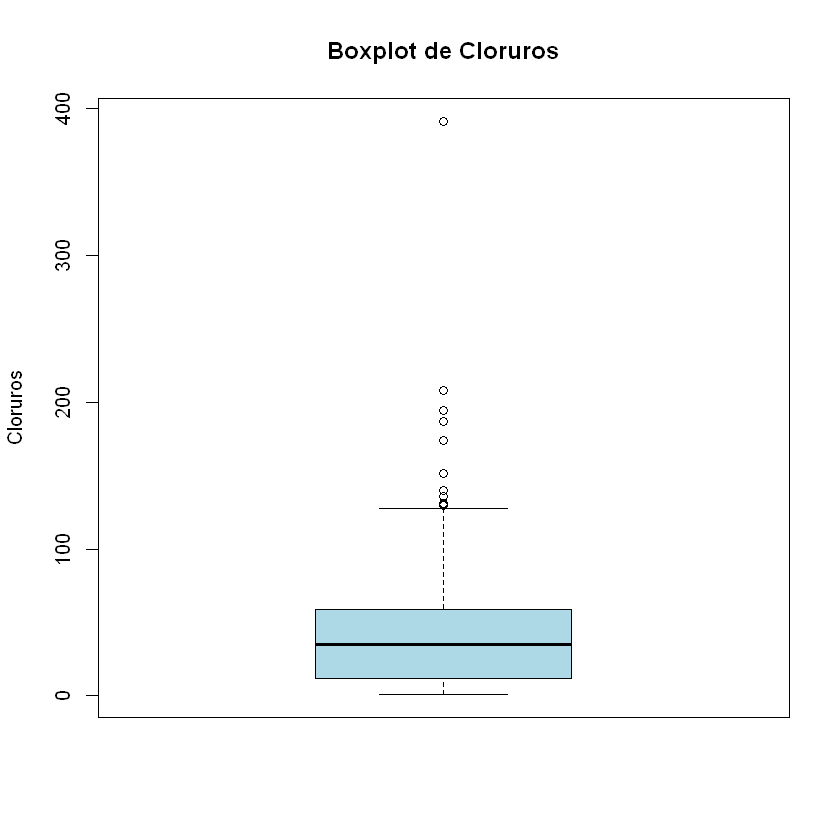

In [15]:
boxplot(data$cl, main="Boxplot de Cloruros", ylab="Cloruros", col="lightblue")

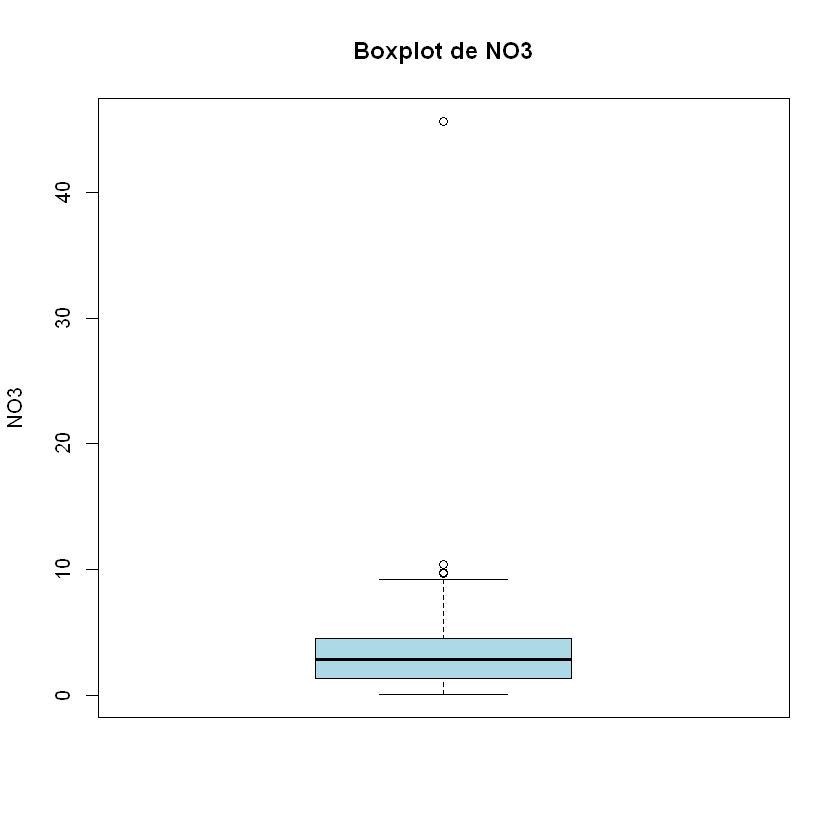

In [16]:
boxplot(data$no3, main="Boxplot de NO3", ylab="NO3", col="lightblue")

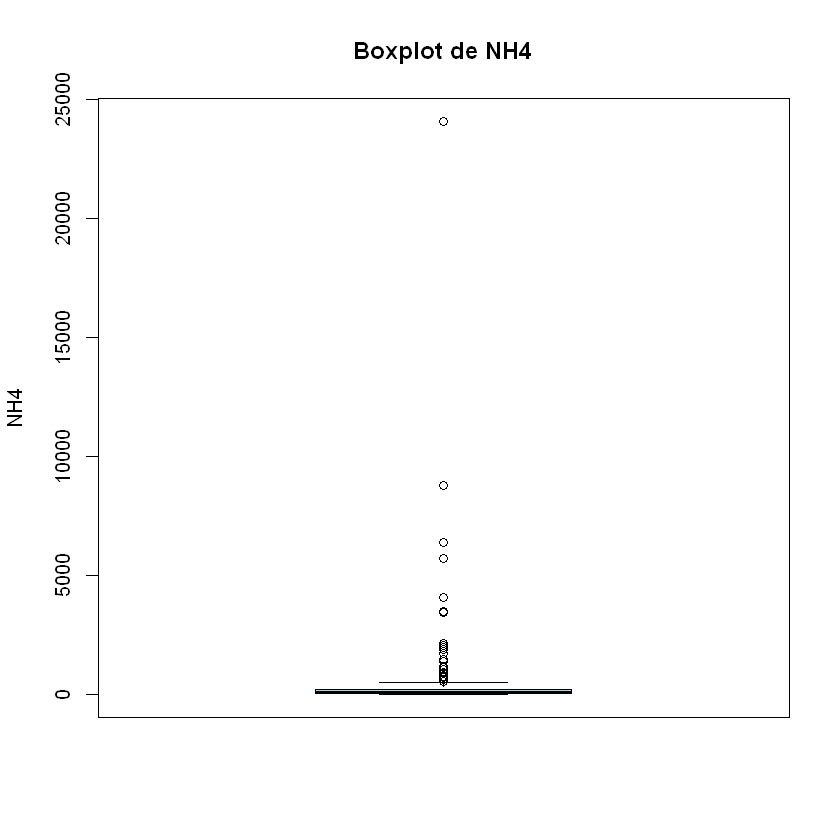

In [17]:
boxplot(data$nh4, main="Boxplot de NH4", ylab="NH4", col="lightblue")

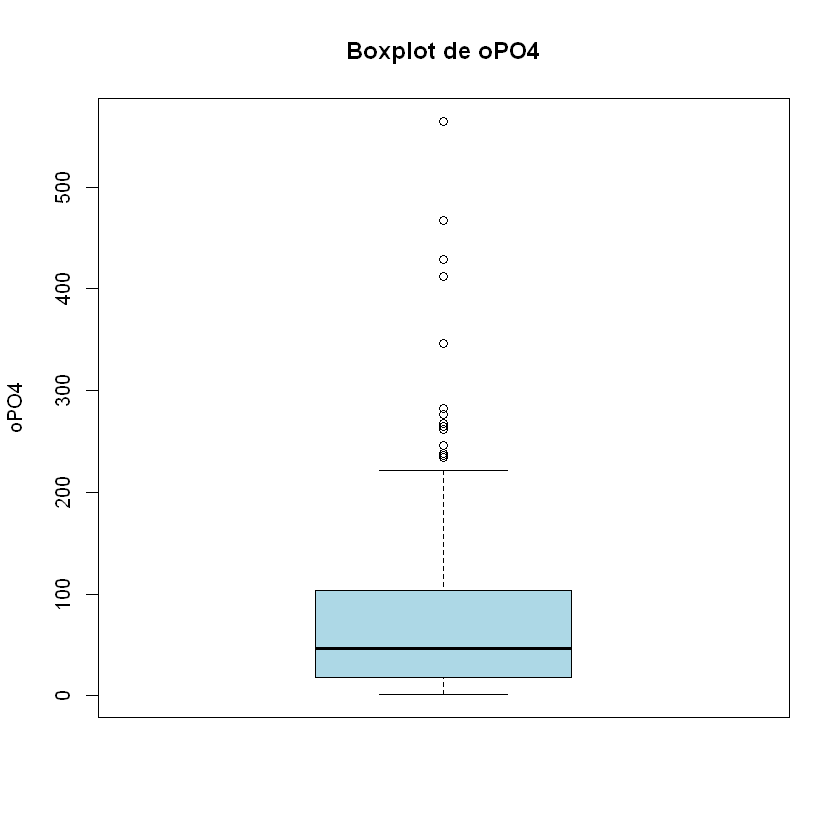

In [18]:
boxplot(data$opo4, main="Boxplot de oPO4", ylab="oPO4", col="lightblue")

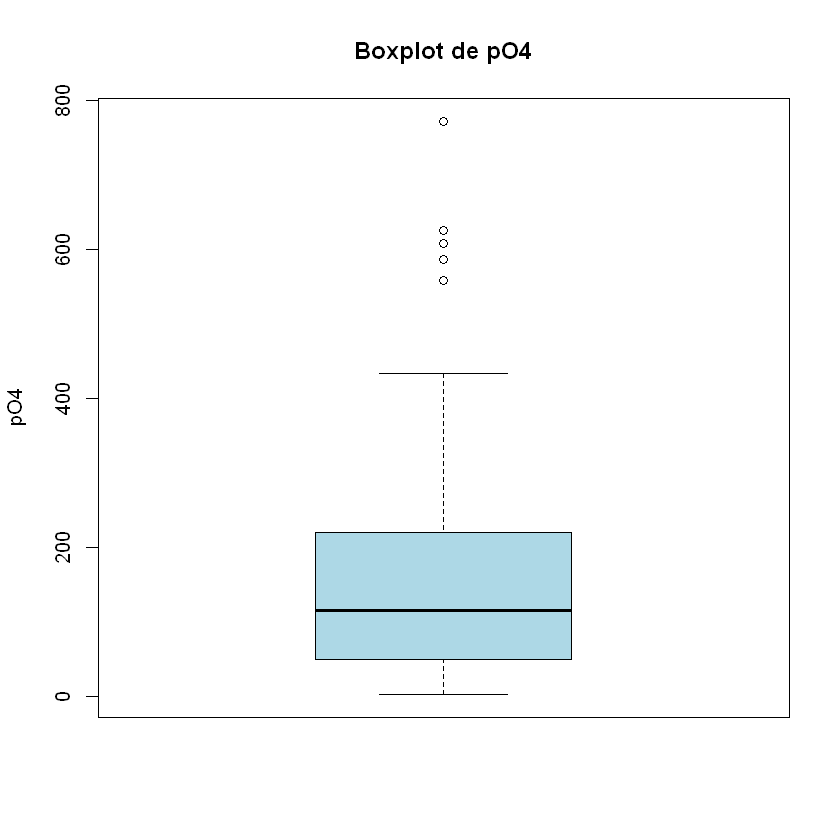

In [19]:
boxplot(data$po4, main="Boxplot de pO4", ylab="pO4", col="lightblue")

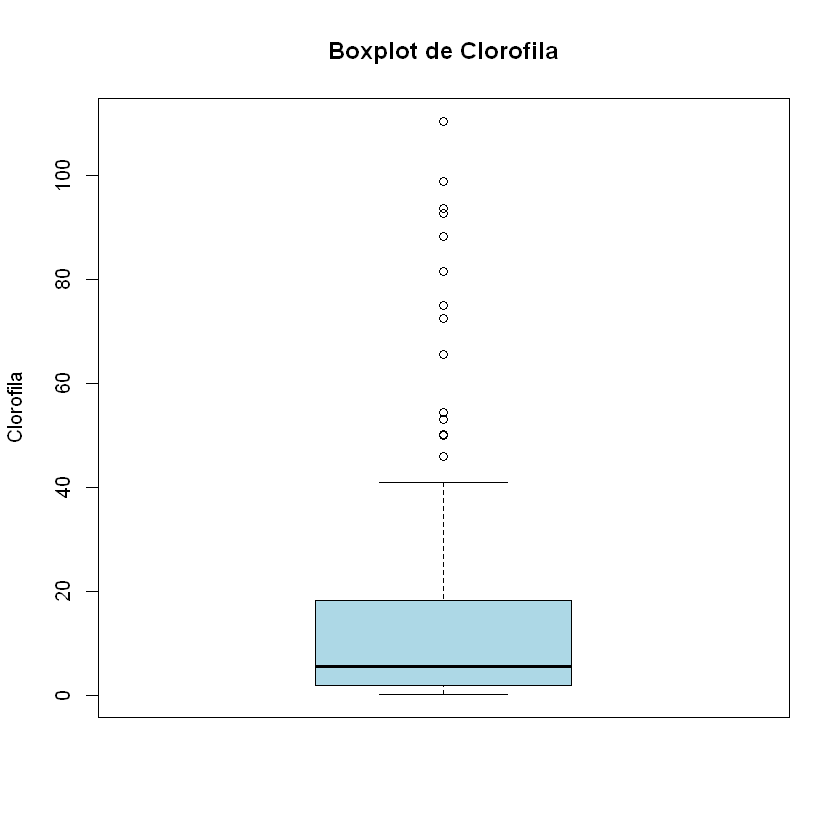

In [20]:
boxplot(data$Clorofila, main="Boxplot de Clorofila", ylab="Clorofila", col="lightblue")

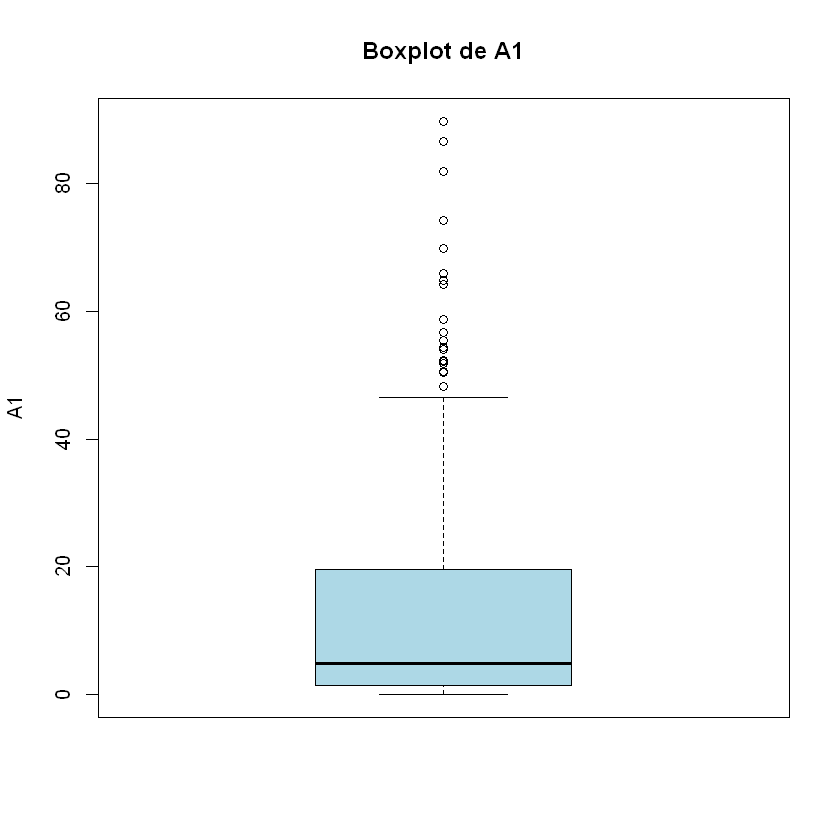

In [21]:
boxplot(data$A1, main="Boxplot de A1", ylab="A1", col="lightblue")

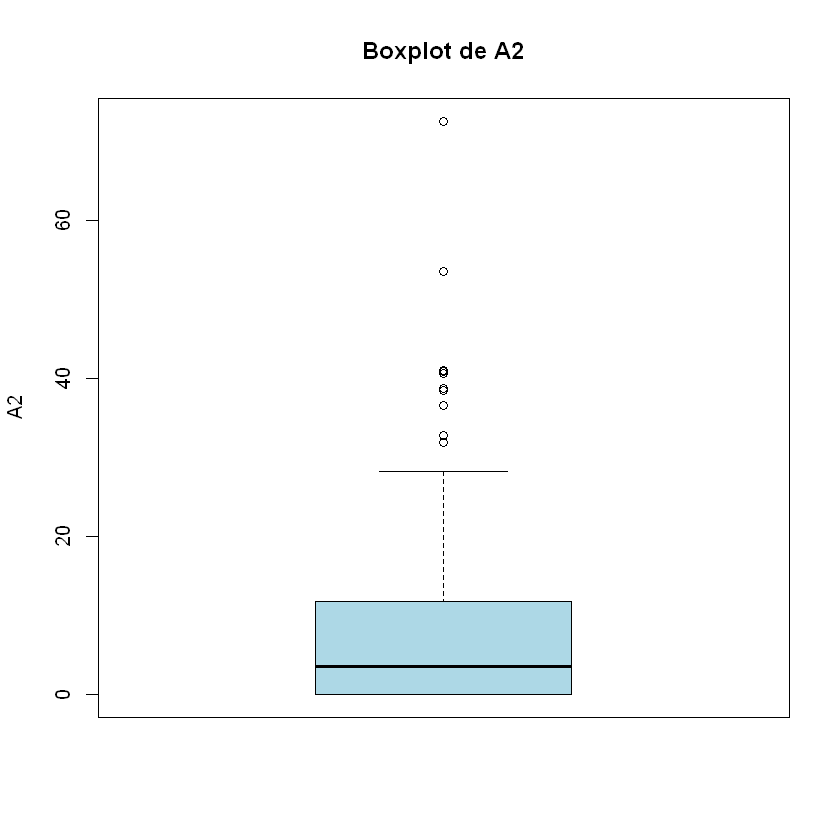

In [22]:
boxplot(data$A2, main="Boxplot de A2", ylab="A2", col="lightblue")

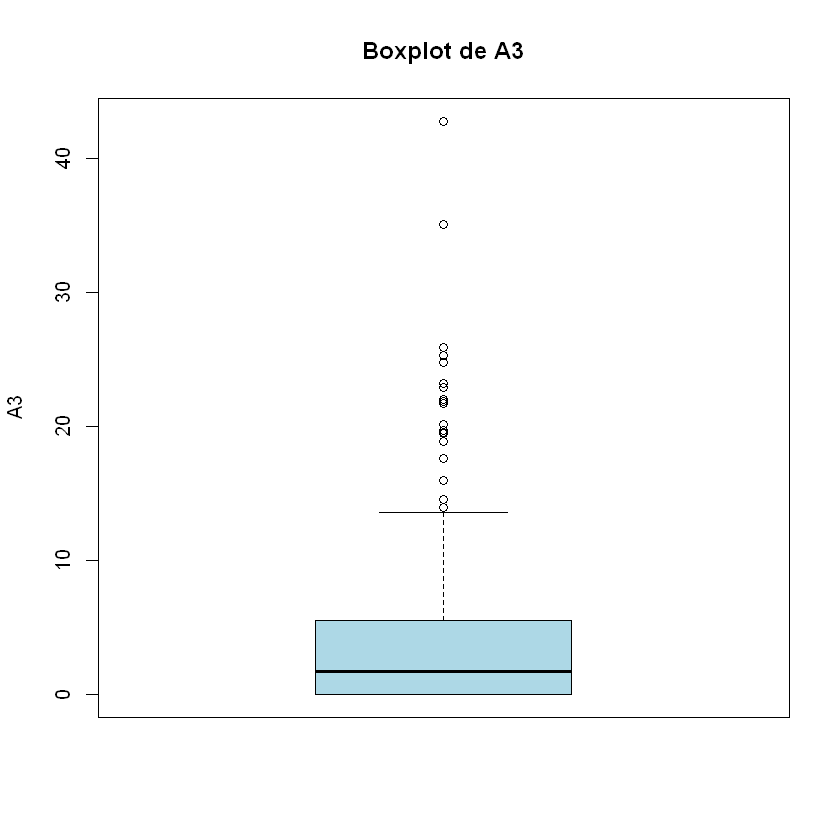

In [23]:
boxplot(data$A3, main="Boxplot de A3", ylab="A3", col="lightblue")

### evaluar que pasa con los outliers en las variables numéricas

In [24]:
indicesNh4 <- data$nh4 == 24064.00
maxNh4 <- data[indicesNh4, ]
maxNh4

estacion,tamano,velocidad,ph,o2,cl,no3,nh4,opo4,po4,Clorofila,A1,A2,A3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
autumn,medium,high,7.3,11.8,44.205,45.65,24064,44,34,53.1,2.2,0,0


In [25]:
indicesA1 <- data$A1 == 0
minA1 <- data[indicesA1, ]
head(minA1)

estacion,tamano,velocidad,ph,o2,cl,no3,nh4,opo4,po4,Clorofila,A1,A2,A3
<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
winter,small,medium,8.00,9.8,60.800,6.238,578.00,105.000,170.000,50.0,0,0.0,0.0
spring,small,medium,7.79,3.2,64.000,2.822,8777.60,564.600,771.600,4.5,0,0.0,0.0
winter,small,medium,7.83,10.7,88.000,4.825,1729.00,467.500,586.000,16.0,0,0.0,0.0
summer,small,high,7.80,11.3,20.083,3.020,49.50,53.000,130.750,5.8,0,8.0,1.9
winter,small,medium,8.00,5.5,77.000,6.096,122.85,143.710,296.000,3.7,0,5.9,10.6
summer,small,medium,8.15,7.1,54.190,3.829,647.57,59.429,175.046,13.2,0,0.0,0.0


### rango intercualtil ( IQR )
para eliminar outliers en la variable NH4

In [26]:
q1_i <- quantile(data$nh4, 0.25)
q2_i <- quantile(data$nh4, 0.50)
q3_i <- quantile(data$nh4, 0.75)

ric <- q3_i - q1_i
ric

75% 
185.875

### determinar liminte inferior y superior para NH4

In [27]:
lim_inf <- q1_i - 1.5 * ric
lim_inf
lim_sup <- q3_i + 1.5 * ric
lim_sup

25% 
-229.4375

75% 
514.0625

### Datos atipicos en NH4

In [28]:
i <- data$nh4
i [i < lim_inf | i > lim_sup]

[1]   578.000  8777.600  1729.000  3515.000  6400.000  1911.000   647.570
 [8]  1386.250  2082.850  2167.370   737.500   914.000  5738.330  4073.330
[15]   758.750   931.833   723.667  3466.660   920.000  1990.160 24064.000
[22]  1131.660  1495.000   643.000   627.273  1168.000  1081.660

### funcion filter para eliminar los outliers en NH4

In [29]:
## Eliminar outliers de NH4 y guardar en data_sin_outliers
data_sin_outliers_nh4 <- data %>% filter(nh4 >= lim_inf & nh4 <= lim_sup)
nrow(data)  # filas originales
nrow(data_sin_outliers_nh4)  # filas después de eliminar outliers

[1] 184

[1] 157

### lo mismo pero para A1

In [30]:
q1_iA <- quantile(data$A1, 0.25)
q2_iA <- quantile(data$A1, 0.50)
q3_iA <- quantile(data$A1, 0.75)

ricA <- q3_iA - q1_iA
ricA

75% 
17.925

### determinar liminte inferior y superior para A1

In [31]:
lim_infA <- q1_iA - 1.5 * ricA
lim_infA
lim_supA <- q3_iA + 1.5 * ricA
lim_supA

25% 
-25.4875

75% 
46.2125

### Datos atipicos en A1

In [32]:
iA <- data$A1
iA [iA < lim_infA | iA > lim_supA]

[1] 52.2 69.9 50.6 74.2 66.0 51.8 54.4 89.8 81.9 54.0 55.5 64.2 64.9 58.7 64.3
[16] 46.6 86.6 52.4 48.3 50.4 56.8

In [33]:
## Eliminar outliers de A1 del dataset ya limpio
data_sin_outliers <- data_sin_outliers_nh4 %>% filter(A1 >= lim_infA & A1 <= lim_supA)
nrow(data_sin_outliers_nh4)  # antes
nrow(data_sin_outliers)  # después

[1] 157

[1] 136

### ver cambios con los outliers eliminados boxplot

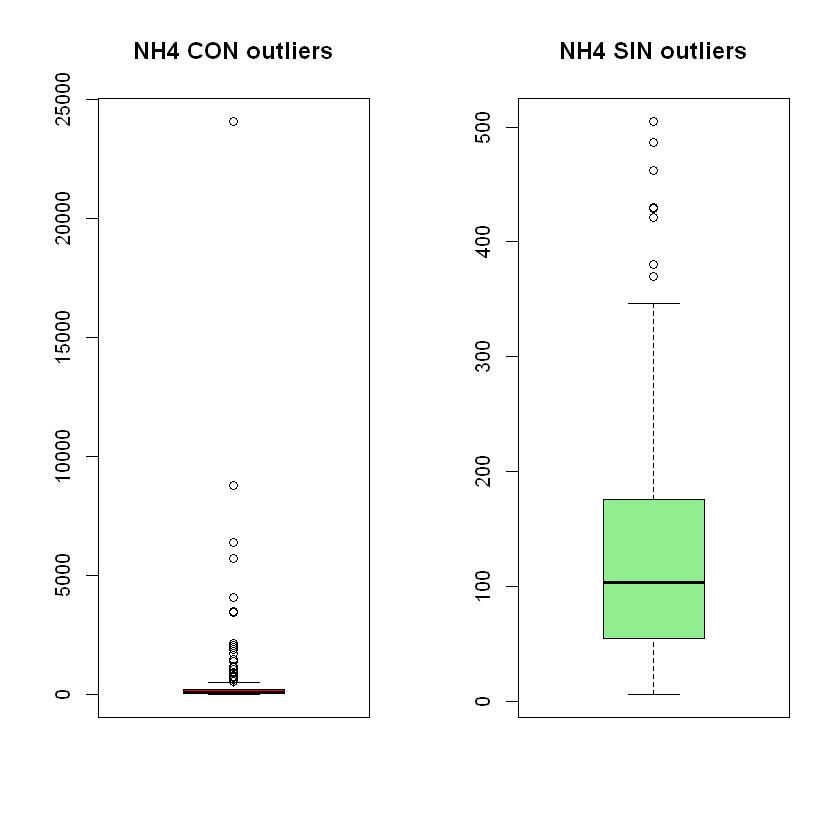

In [34]:
## Comparar boxplot ANTES y DESPUÉS de eliminar outliers
par(mfrow=c(1,2))
boxplot(data$nh4, main="NH4 CON outliers", col="red")
boxplot(data_sin_outliers$nh4, main="NH4 SIN outliers", col="lightgreen")

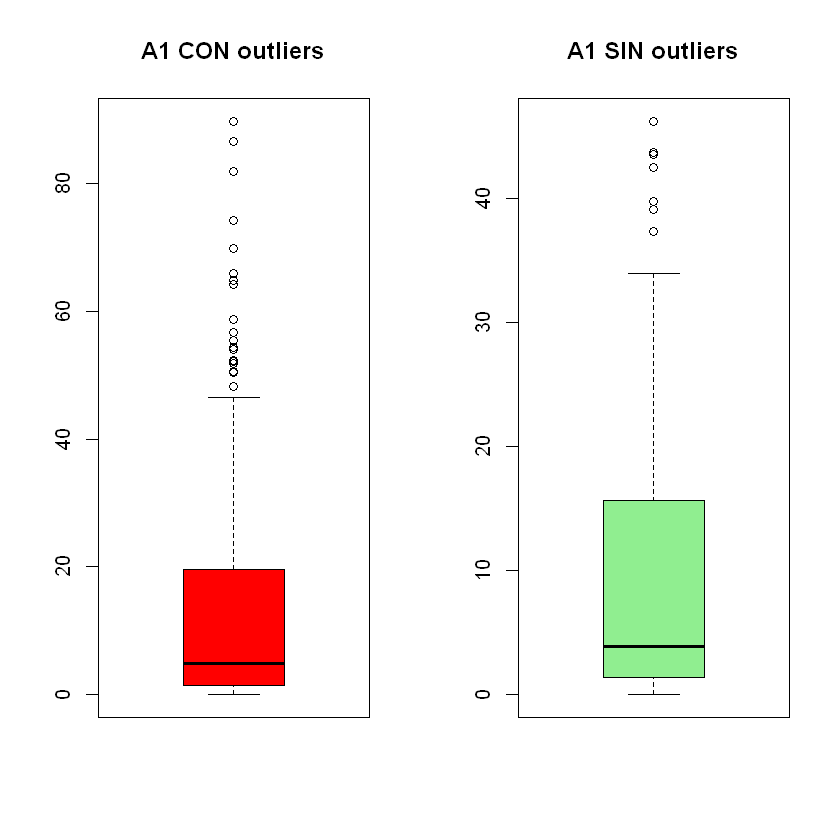

In [35]:
## Comparar boxplot A1 ANTES y DESPUÉS
par(mfrow=c(1,2))
boxplot(data$A1, main="A1 CON outliers", col="red")
boxplot(data_sin_outliers$A1, main="A1 SIN outliers", col="lightgreen")

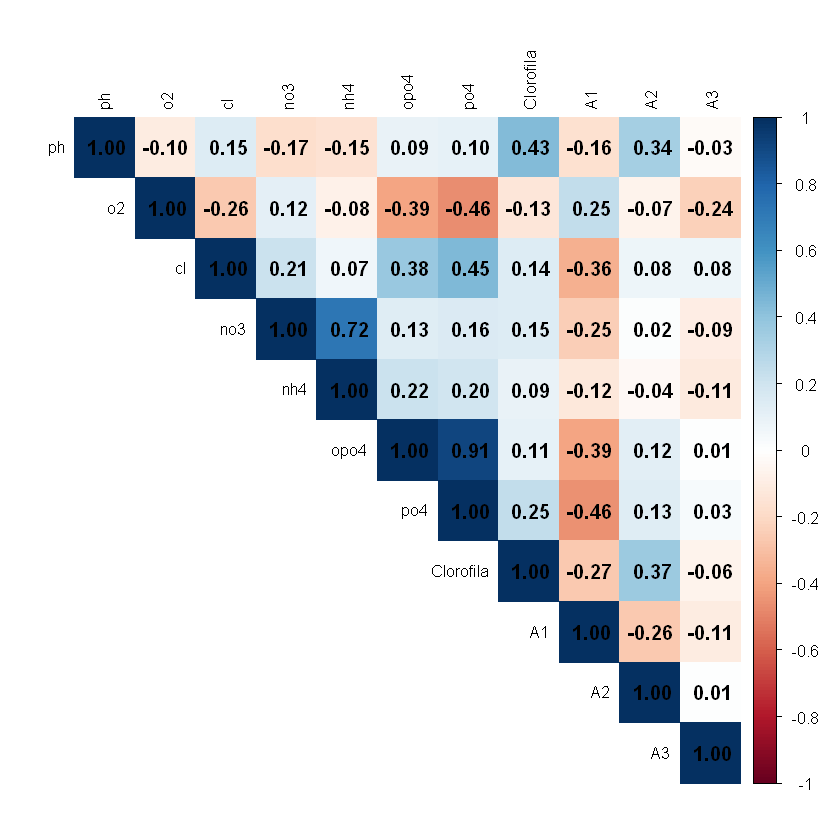

In [ ]:
numeric_data <- select(data, where(is.numeric))
matriz_corr <- cor(numeric_data, method="pearson")
corrplot(matriz_corr, method = "color", type = "upper", 
         tl.col = "black", tl.cex = 0.8, addCoef.col = "black")

In [37]:
modelo <- lm(Clorofila ~ estacion + tamano + velocidad + ph + o2 + cl + no3 +
                nh4 + opo4 + po4 + A1 + A2 + A3, data=data_sin_outliers)
summary(modelo)


Call:
lm(formula = Clorofila ~ estacion + tamano + velocidad + ph + 
    o2 + cl + no3 + nh4 + opo4 + po4 + A1 + A2 + A3, data = data_sin_outliers)

Residuals:
    Min      1Q  Median      3Q     Max 
-52.321  -8.542  -1.668   6.686  64.429 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.179e+02  3.453e+01  -3.415 0.000874 ***
estacionspring   1.885e+00  4.821e+00   0.391 0.696545    
estacionsummer   8.099e-01  4.552e+00   0.178 0.859080    
estacionwinter  -6.140e-01  4.556e+00  -0.135 0.893029    
tamanomedium    -1.297e+00  4.274e+00  -0.304 0.761997    
tamanosmall      1.521e+00  5.114e+00   0.297 0.766626    
velocidadlow     1.228e+01  5.168e+00   2.377 0.019072 *  
velocidadmedium -2.426e+00  3.826e+00  -0.634 0.527287    
ph               1.396e+01  3.897e+00   3.582 0.000496 ***
o2               5.971e-01  8.430e-01   0.708 0.480166    
cl              -2.047e-02  3.530e-02  -0.580 0.563045    
no3             -3.414e-01  7.853e